Here we are using the Google Playstore dataset, which contains details about the Apps in playstore, there are more than 10,0000+ Apps in the playstore.The size of the dataset is 210Mb.

The main objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# The %matplotlib inline magic command is specifically used in Jupyter Notebooks or JupyterLab environments.
# It allows Matplotlib plots to be displayed directly within the notebook interface, rather than opening them in a separate window.
# When you execute %matplotlib inline, it sets the backend of Matplotlib to render the plots as static images embedded directly
# in the notebook. This is particularly useful for generating and visualizing plots interactively within the notebook
# environment without any additional configuration.

## downloading & importing data

In [3]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

Skipping, found downloaded files in ".\google-playstore-apps" (use force=True to force download)


## Data Preparation and Cleaing

In [4]:
df = pd.read_csv(r"E:\CampusX_DS\week43 - data analysis project\Google_play_store_analysis\google-playstore-apps\Google-Playstore.csv")

In [5]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [6]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [7]:
df.shape

(2312944, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

## Observations

In [9]:
## it has 2312944 rows & 24 columns
## Rating Count is float64, we can change it to int64 to reduce memory

## Descriptive statistics

In [10]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [11]:
#to change values in numbers instead of exponentials
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.00,2290061.00,2312837.00,2312944.00,2312944.00
mean,2.20,2864.84,183445.21,320201.71,0.10
std,2.11,212162.57,15131439.06,23554954.89,2.63
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,50.00,84.00,0.00
50%,2.90,6.00,500.00,695.00,0.00
75%,4.30,42.00,5000.00,7354.00,0.00
max,5.00,138557570.00,10000000000.00,12057627016.00,400.00


In [13]:
## we have 5 numerical cols
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00,0.00,10+,10.00,15,True,0.00,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40,64.00,"5,000+",5000.00,7662,True,0.00,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00,0.00,50+,50.00,58,True,0.00,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00,5.00,10+,10.00,19,True,0.00,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00,0.00,100+,100.00,478,True,0.00,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## Missing values in the data

In [15]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [16]:
#missing value in percentage
(df.isnull().sum().sort_values(ascending = False)/len(df))*100

Developer Website   32.89
Privacy Policy      18.20
Released             3.07
Rating               0.99
Rating Count         0.99
Minimum Android      0.28
Size                 0.01
Currency             0.01
Installs             0.00
Minimum Installs     0.00
Developer Id         0.00
Developer Email      0.00
App Name             0.00
App Id               0.00
Price                0.00
Free                 0.00
Maximum Installs     0.00
Last Updated         0.00
Content Rating       0.00
Category             0.00
Ad Supported         0.00
In App Purchases     0.00
Editors Choice       0.00
Scraped Time         0.00
dtype: float64

## observations

- The columns having highest percentage of null values are :
Developer Website
Privacy Policy

these two are not that much helpful if we want we can drop these columns and in the further steps we drop and add some features in the dataset after the Analysis.

- we can drop the small null values for the columns
Size
Currency
Installs
Minimum Installs
Developer Id
Developer Email

- Rating,Rating Count,Released are important column so it is good to fill the null values.
Rating
Rating count
Minimum Andriod
Released

In [17]:
df.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)

In [18]:
df.shape

(2312545, 24)

In [19]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760713
Privacy Policy       420843
Released              70748
Rating                22572
Rating Count          22572
Minimum Android        6530
Developer Id              0
Editors Choice            0
In App Purchases          0
Ad Supported              0
Content Rating            0
Last Updated              0
Developer Email           0
App Name                  0
App Id                    0
Size                      0
Currency                  0
Price                     0
Free                      0
Maximum Installs          0
Minimum Installs          0
Installs                  0
Category                  0
Scraped Time              0
dtype: int64

## Now let's start cleaning the each row

In [20]:
# checking any duplicates in the App Name

In [21]:
df['App Name'].duplicated().any()

True

In [22]:
df['App Name'].value_counts()

App Name
Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: count, Length: 2177592, dtype: int64

In [23]:
# from the above cell output we can see that App Name column has multiple rows. Let's check out that data in those rows is identical or not

In [24]:
df[df['App Name'] == 'Tic Tac Toe']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.00,0.00,10+,10.00,30,True,0.00,USD,3.4M,4.0 and up,ATTE AKA FRANCOIS,https://ne2ad32ee.app-ads-txt.com,dev.atte.francois@gmail.com,"May 18, 2018","May 18, 2018",Everyone,NaN,True,False,False,2021-06-15 20:23:22
13758,Tic Tac Toe,com.md.tictactoe,Board,0.00,0.00,10+,10.00,31,True,0.00,USD,34M,4.3 and up,Smart Digital Tools,NaN,msms.zaman@gmail.com,"Nov 2, 2020","Nov 18, 2020",Everyone,https://smartdailytools.blogspot.com/2020/09/p...,True,False,False,2021-06-15 20:32:58
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.20,11.00,"5,000+",5000.00,6379,True,0.00,USD,7.4M,7.0 and up,Sundeep Reddy Thirumuru,NaN,sundeep.thirumuru@gmail.com,"Apr 13, 2021","Jun 03, 2021",Everyone,NaN,True,False,False,2021-06-15 20:44:27
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.00,0.00,500+,500.00,922,True,0.00,USD,8.6M,4.1 and up,SteadFast Games,NaN,devmethyl@outlook.com,"Feb 13, 2020","Feb 13, 2020",Everyone,NaN,True,False,False,2021-06-15 20:47:17
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.00,0.00,10+,10.00,38,True,0.00,USD,927k,4.0 and up,SnatchDreams,https://www.snatchdreams.net,snatchdreams@gmail.com,"Jul 16, 2017","Oct 16, 2019",Everyone,https://www.snatchdreams.net/privacy/tic-tac-toe/,True,False,False,2021-06-15 20:50:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.80,9269.00,"500,000+",500000.00,800662,True,0.00,USD,2.3M,2.3 and up,Mobile Apps Pro,NaN,smartyka@gmail.com,"Jan 9, 2015","May 20, 2015",Everyone,http://mobileappspro.yolasite.com,True,False,False,2021-06-16 12:23:56
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.00,0.00,50+,50.00,50,True,0.00,USD,3.5M,5.0 and up,Jainam Jhaveri,https://erjainam.com,engineerjainam@gmail.com,"Sep 2, 2018","Sep 02, 2018",Everyone,https://docs.google.com/document/d/1Tyi5D3VxZu...,True,False,False,2021-06-16 12:31:30
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.70,7.00,10+,10.00,34,True,0.00,USD,5.3M,4.1 and up,Cybertron's Hogwarts,http://prudhvikchirunomula.pythonanywhere.com/,prudhvik.1996@gmail.com,"Sep 4, 2019","Sep 17, 2019",Everyone,NaN,False,False,False,2021-06-16 12:32:05
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.80,20.00,100+,100.00,462,True,0.00,USD,2.1M,2.2 and up,Infuse Apps,http://www.infuseapps.com,infuseandroidapps@gmail.com,"Jan 18, 2015","Jan 18, 2015",Everyone,NaN,True,False,False,2021-06-16 12:47:11


In [25]:
## App id

In [26]:
df['App Id'].duplicated().any()

False

In [27]:
df['App Id'].value_counts()

App Id
com.ishakwe.gakondo                    1
com.walterscazzosi.favorkout           1
com.app.p2631ED                        1
com.myhomebuy                          1
com.apocalipseescatologia.app          1
                                      ..
id.compro.virtualcompetition           1
com.fitivity.basketball_point_guard    1
smartgr.gardenshower.ideas             1
com.euroland.mobiletools.ae_nbad       1
com.yyazilim.biliyormusun              1
Name: count, Length: 2312545, dtype: int64

In [28]:
# we have the Apps with the same names but with the unique App IDs so the Apps are differed based on the App IDs

## let's Explore the numerical columns

In [29]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [30]:
## since dtype is object, we need to do some cleaning & change it into int

In [31]:
df['Installs'] = df['Installs'].str.split('+').str[0]    # reomoves the + symbol
df['Installs'].replace(',','', regex=True, inplace=True) #replace the commas ',' in the install column

C:\Users\Prashant Jain\AppData\Local\Temp\ipykernel_9612\2202300142.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Installs'].replace(',','', regex=True, inplace=True) #replace the commas ',' in the install column


In [32]:
df['Installs'].unique()

array(['10', '5000', '50', '100', '1000', '500', '50000', '10000', '1',
       '500000', '100000', '5', '10000000', '1000000', '5000000', '0',
       '100000000', '50000000', '1000000000', '500000000', '5000000000',
       '10000000000'], dtype=object)

In [33]:
# df['Installs'] = df['Installs'].astype(int) ---> getting overflow error
df['Installs'] = df['Installs'].astype(np.int64)

In [34]:
df['Installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000], dtype=int64)

In [35]:
## currency

In [36]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [37]:
## size

In [38]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [39]:
# The Size of data can be in GB, MB and KB let's convert the data into the size in MB

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [41]:
df['Size'].value_counts()

Size
Varies with device    74704
11M                   62157
12M                   56078
13M                   48034
14M                   45211
16M                   42473
15M                   41305
17M                   37243
10M                   34112
18M                   31703
19M                   29720
21M                   29021
20M                   28796
22M                   28259
23M                   27336
24M                   25300
25M                   25022
26M                   23897
27M                   21825
28M                   21156
29M                   20049
37M                   18656
30M                   18625
31M                   18148
4.9M                  17967
32M                   17629
4.2M                  17421
3.8M                  17192
3.7M                  16927
38M                   16810
3.4M                  16752
33M                   16681
4.0M                  16481
3.5M                  16379
3.9M                  16287
3.3M           

In [42]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [43]:
# here we get a missmatched value with the data we got the value 1,018 we can drop it or we can assume as
# it may be a '.' (dot) the would incorrectly added to the dataset. so let assume it as dot for now and repalce the ',' with the dot '.'

In [44]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

In [45]:
# conversion of kbs to mb

In [46]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [47]:
#df['Size'] = df['Size'].apply(lambda x: float(x))

In [48]:
# we get an another missmatch value in the data set which is 'Varies with device' it means the size of the App may vaies with
# the device---> but here I am assuming it as 0

In [49]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [50]:
#df['Size'] = df['Size'].apply(lambda x: float(x))

In [51]:
# conversion of data Gbs to Mb

In [52]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [53]:
df['Size'] = df['Size'].apply(lambda x: float(x))

In [56]:
df.dtypes['Size']

dtype('float64')

In [59]:
df['Minimum Android'].sample(7)

570062     5.0 and up
533014     4.1 and up
1487362    4.1 and up
1387168    5.0 and up
1502606    4.1 and up
1387683    5.0 and up
1875697    5.0 and up
Name: Minimum Android, dtype: object

In [62]:
df['Content Rating'].value_counts()

Content Rating
Everyone           2021785
Teen                196311
Mature 17+           60278
Everyone 10+         33881
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

In [63]:
df['Released'].sample(7)

201214      May 3, 2021
202080      Dec 6, 2018
988004     Dec 22, 2018
1007794     Jun 9, 2020
1330203    Jul 15, 2016
881390     Nov 14, 2019
1524019     Jan 5, 2021
Name: Released, dtype: object

In [64]:
df['Last Updated'].sample(7)

197372     Apr 13, 2021
12013      Jul 24, 2019
665892     Jun 07, 2021
730314     May 25, 2020
143677     Feb 21, 2020
2252827    Feb 11, 2021
518990     Feb 09, 2017
Name: Last Updated, dtype: object

In [65]:
df['Privacy Policy'].sample(7)

1586013               https://zvolv.com/screens/privacy.html
842811            https://bakasdo.flycricket.io/privacy.html
1917608                                                  NaN
35261      http://yondroid.online/rumusmatematikasd/priva...
790901                                     http://conway.in/
2018217    https://sites.google.com/view/privacypolicyfun...
82254              https://kubito.flycricket.io/privacy.html
Name: Privacy Policy, dtype: object

In [66]:
df['Scraped Time'].sample(7)

941605     2021-06-16 11:24:06
1446812    2021-06-16 00:33:28
509416     2021-06-16 04:43:35
29597      2021-06-15 20:48:50
579865     2021-06-16 05:47:04
876454     2021-06-16 10:23:53
310390     2021-06-16 01:39:23
Name: Scraped Time, dtype: object

In [67]:
df['Free'].sample(7)

2227789    True
1510649    True
1106842    True
1232162    True
2114988    True
1342303    True
630523     True
Name: Free, dtype: bool

In [68]:
# Creataing the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps

In [69]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

In [70]:
# let's clean the Content Rating column

In [71]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [72]:
df['Content Rating'].value_counts()

Content Rating
Everyone           2021785
Teen                196311
Mature 17+           60278
Everyone 10+         33881
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

In [73]:
# we have varies Categories in the content Rating column :
# Everyone
# Teen
# Mature 17+
# Everyone 10+
# Unrated
# Adults only 18+
# Now, we makes this Categories to a simple 3 Categories for better understanding :
# Everyone, Teen, Adults

# Mature 17+ ----> to Adults
# Everyone 10+ ----> to Teen
# Unrated ----> to Everyone
# Adults only 18+ -> to Adults

In [74]:
df["Content Rating"]=df["Content Rating"].replace("Unrated","Everyone")
df["Content Rating"]=df["Content Rating"].replace("Everyone 10+","Teen")
df["Content Rating"]=df["Content Rating"].replace("Mature 17+","Adults")
df["Content Rating"]=df["Content Rating"].replace("Adults only 18+","Adults")

In [75]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312545 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               float64
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
dtypes: bool(3), float64(5), int64(2), object(14)
memory usa

In [77]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [78]:
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [79]:
# let's change the Rating Count to certain ranges for the better understanding the data

In [80]:
df['Rating Count'].max()

138557570.0

In [81]:
df['Rating Type'] = 'NoRatingProvided'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'Rating Type'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'Rating Type'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 138557570.0),'Rating Type'] = 'More than 500K'
df['Rating Type'].value_counts()

Rating Type
Less than 10K           1192798
NoRatingProvided        1082303
Between 10K and 500K      35779
More than 500K             1665
Name: count, dtype: int64

In [82]:
df['Rating Type'].sample(7)

869815        NoRatingProvided
475144           Less than 10K
212077           Less than 10K
401357    Between 10K and 500K
864620           Less than 10K
65028            Less than 10K
681383           Less than 10K
Name: Rating Type, dtype: object

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312545 entries, 0 to 2312943
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               float64
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
 24  Rating Type        object 
dtypes: bool(3), float64(5),

### What are the top 10 Categories that are installed from the Google Play Store ?

In [102]:
top_category = df['Category'].value_counts().reset_index().rename(columns={'Category':'Category','index':'Category'})

In [103]:
top_category

,Category,count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138259
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [100]:
top_installs = df.groupby('Category')['Installs'].sum().reset_index().rename(columns={'Category':'Category','index':'Category'})

In [101]:
top_installs

,Category,Installs
0,Action,17399855328
1,Adventure,5390108856
2,Arcade,14501230845
3,Art & Design,1116398902
4,Auto & Vehicles,1594745418
5,Beauty,404328787
6,Board,3290826164
7,Books & Reference,4819175179
8,Business,5236661902
9,Card,1989318718


In [106]:
top_category_by_installs = pd.merge(top_category, top_installs, on='Category')

In [111]:
top_category_by_installs = top_category_by_installs.sort_values(by='Installs', ascending=False).head(10)

In [112]:
top_category_by_installs

,Category,count,Installs
2,Tools,143971,71440271217
17,Communication,48157,43216592414
9,Productivity,79681,28313922253
21,Photography,35552,18998958963
31,Video Players & Editors,14014,18591154109
23,Action,27539,17399855328
19,Social,44724,17165994565
4,Entertainment,138259,17108396833
16,Casual,50790,16836783725
14,Arcade,53778,14501230845


<Axes: title={'center': 'Top 10 Installed Categories'}, xlabel='Category', ylabel='Number of applications'>

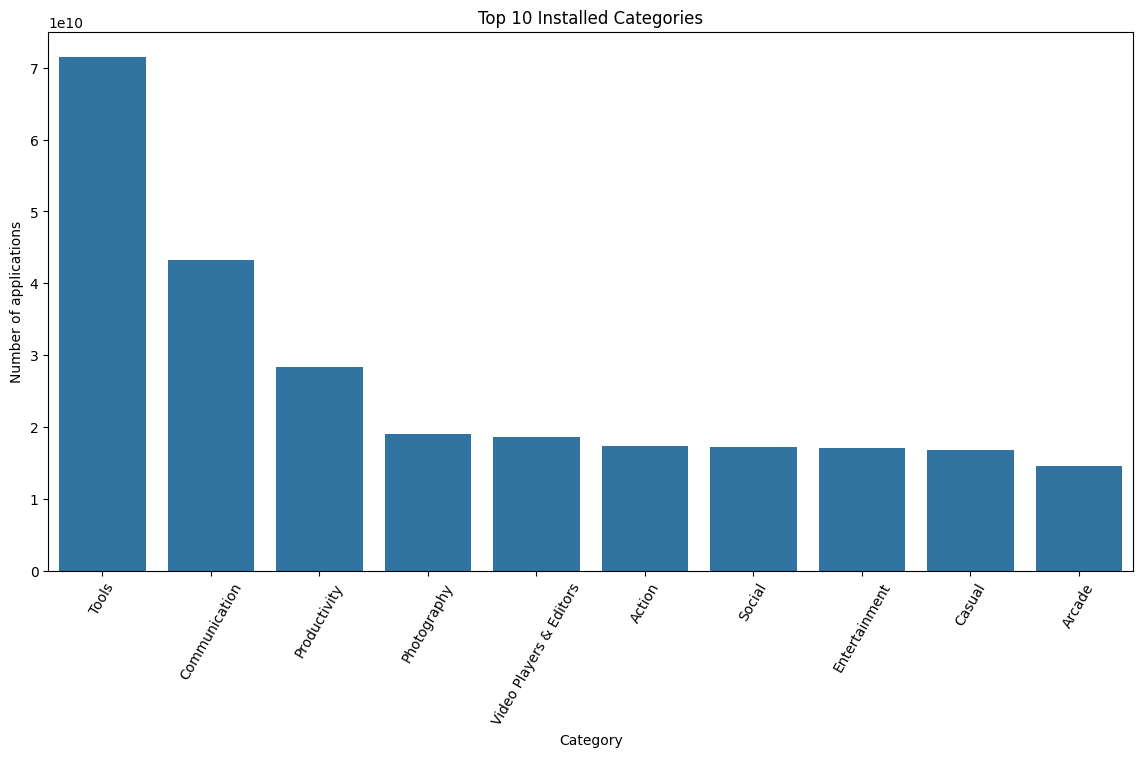

In [114]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_category_by_installs.Category,y= top_category_by_installs.Installs)  

### What are the 10 Categories in playstore as per the count?

In [119]:
top_category.head(10)

,Category,count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138259
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


<Axes: xlabel='Category'>

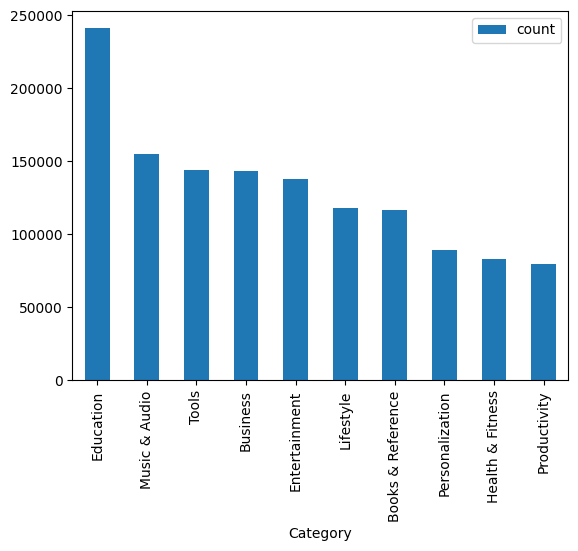

In [125]:
top_category.set_index('Category', inplace=True)
top_category.head(10).plot(kind='bar')

In [126]:
## as we can see from above 2 graphs in top caegory installed & top category by app count have some similar categories which are
## tools, music, entertainment etc

### distribution of rating

Text(0.5, 1.0, 'Distribution of Rating')

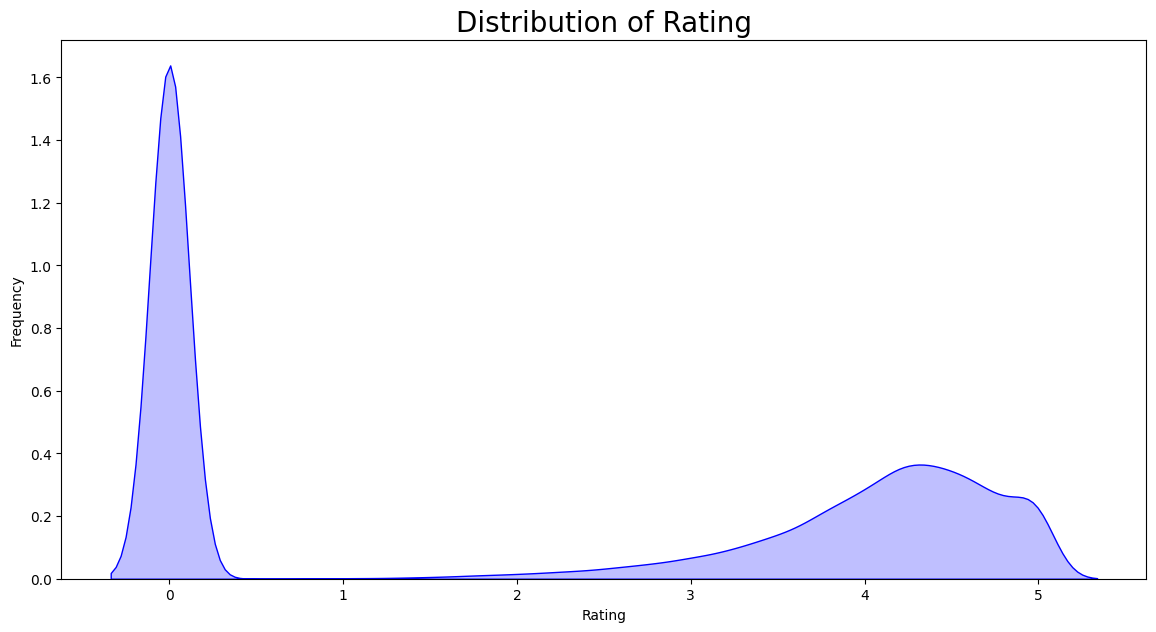

In [131]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.Rating, color="Blue", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

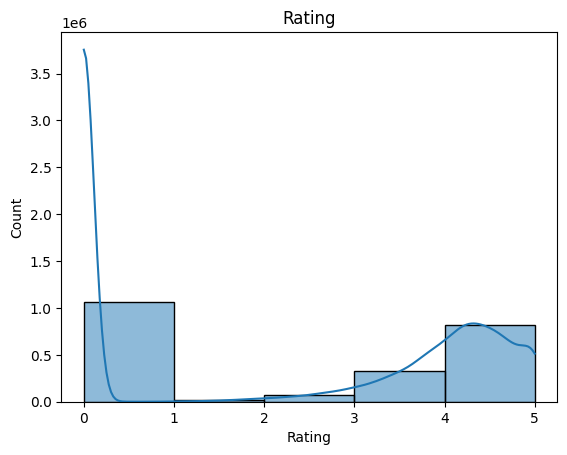

In [132]:
plt.title("Rating")
sns.histplot(df.Rating,kde=True,bins=5)

In [133]:
# From the above two plots we can see that most people does not give a rating,But one more thing that
# comes out from this graph as well is that people tend to give 4+ rating the most.

### What is the highest rated Category?

<Axes: title={'center': 'All Categories Rating '}, xlabel='Highest Rated Category', ylabel='Number of applications'>

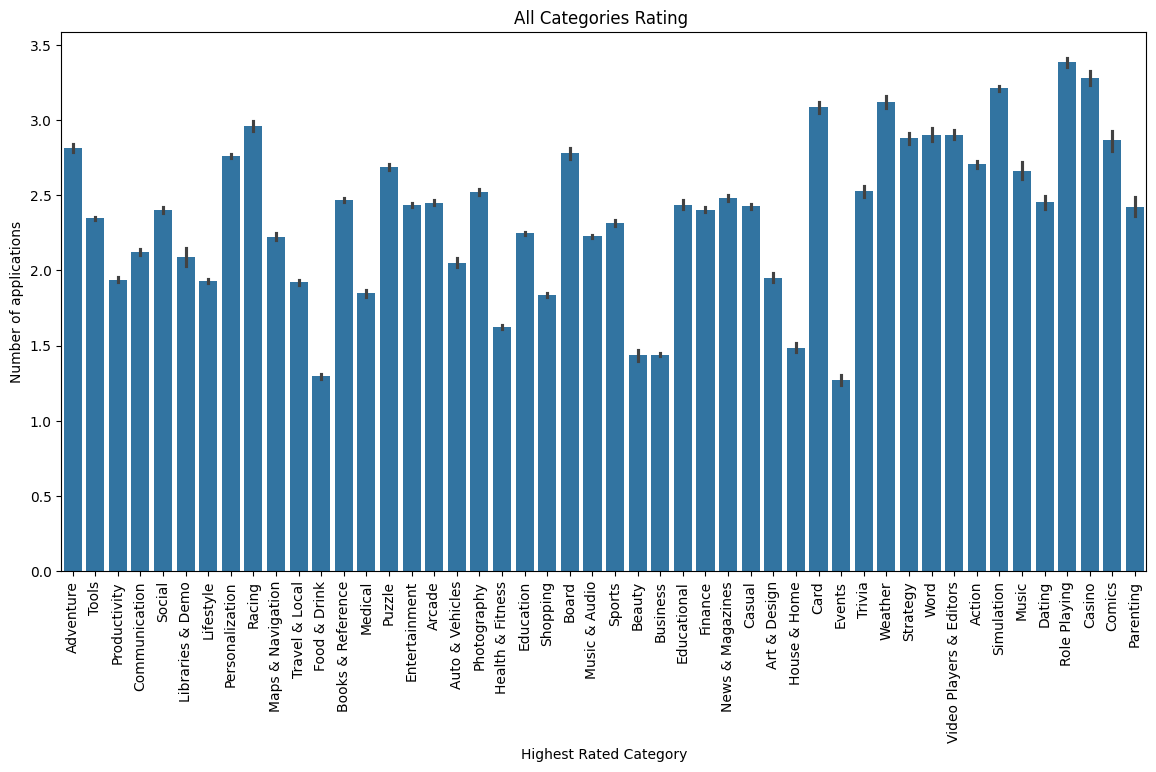

In [134]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.Category,y = df.Rating)

In [135]:
# From the above plot we can see that Role Playing is the highest Rated category

In [136]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

<Axes: title={'center': 'Content Rating and Maximum installations '}, xlabel='Maximum Installs', ylabel='Rating Count'>

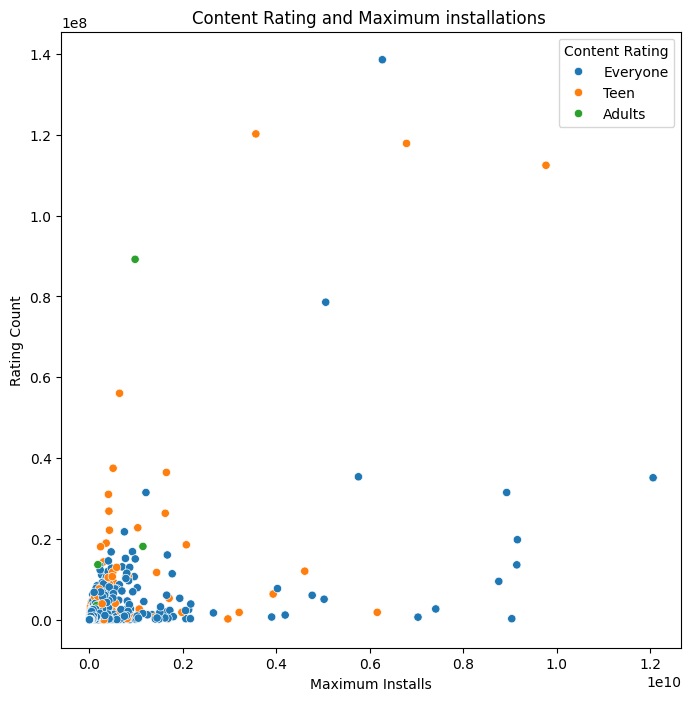

In [137]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

In [138]:
# This scatterplot shows us that: If we exclude everyone from the plot and when focus on Teen and Adults we can see that teens have
# much engagement in terms of download and rating count.

### Which Category has the highest Paid and Free apps ?

In [140]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time', 'Type', 'Rating Type'],
      dtype='object')

In [145]:
app_count = df.groupby(['Category','Type'])[['App Name']].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})

In [148]:
df_app_count = app_count.pivot(index='Category', columns='Type', values='Count').fillna(0).reset_index()

Text(0.5, 1.0, 'Free and Paid Apps in Category')

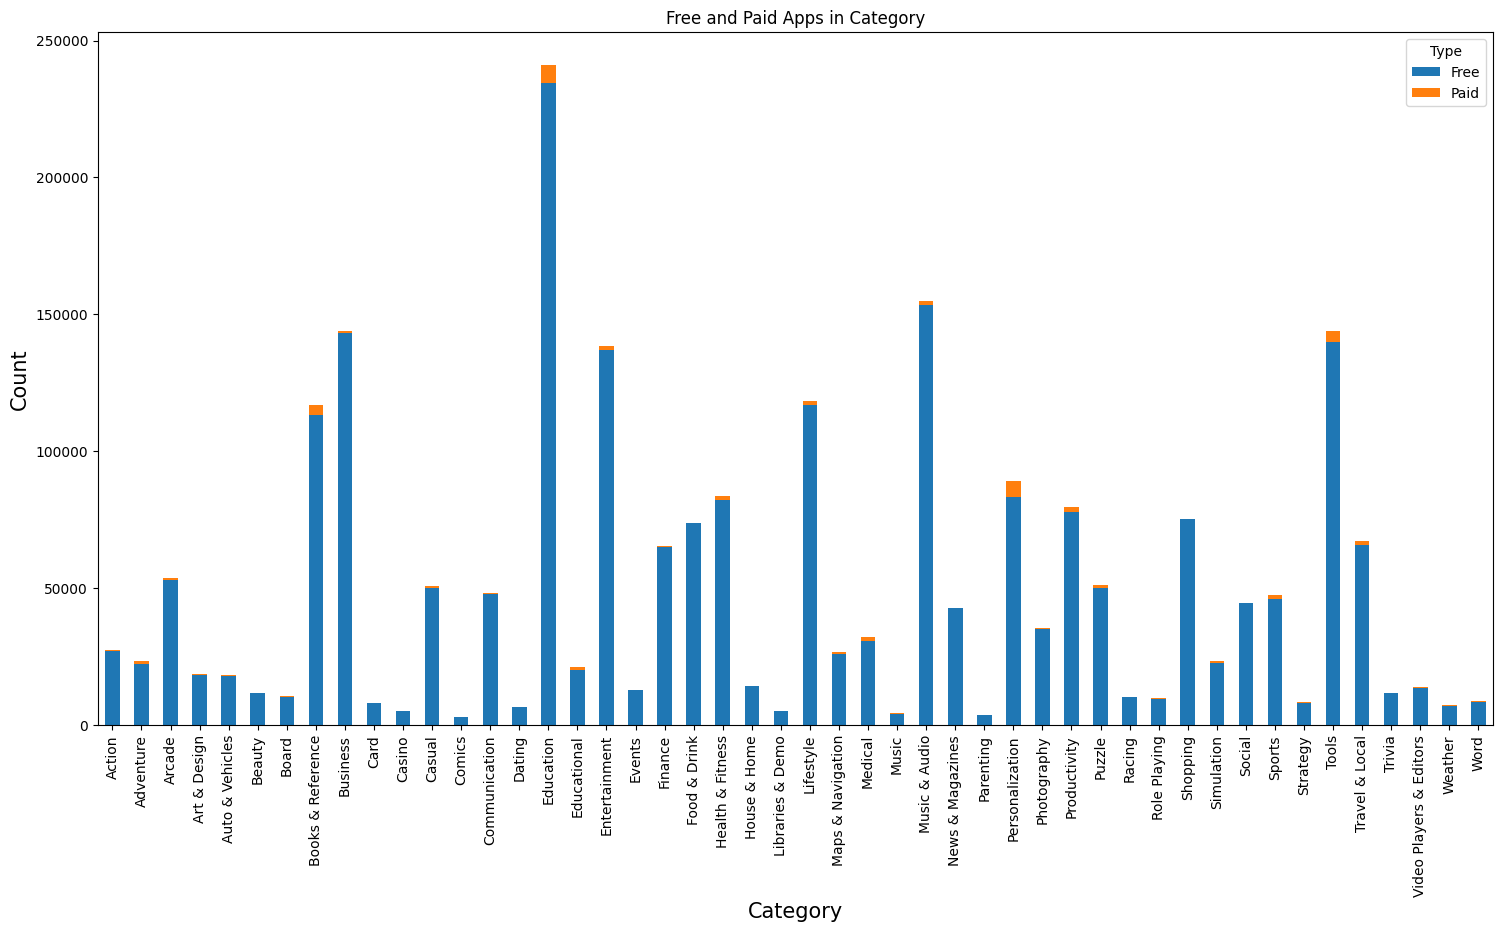

In [149]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9)) # try df_app_count.plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

In [150]:
# Education Category is the highest in paid apps list

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Business,Education, Music & Audio, Tools as well as Social categories were free to install. At the same time Books & References, Education, Tools and Personalization categories had the biggest number of paid apps available for Installation.

### visualize the Installation Types in each category

In [151]:
df['Installs'].min(),df['Installs'].max()

(0, 10000000000)

There is a high variance in the number of installs, we need to reduce it so we can use a log value for this column, otherwise it would be unable to see the data when we visualize

In [152]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

<Axes: title={'center': 'Number of installed Apps type wise according to Category'}, xlabel='Category', ylabel='Installs'>

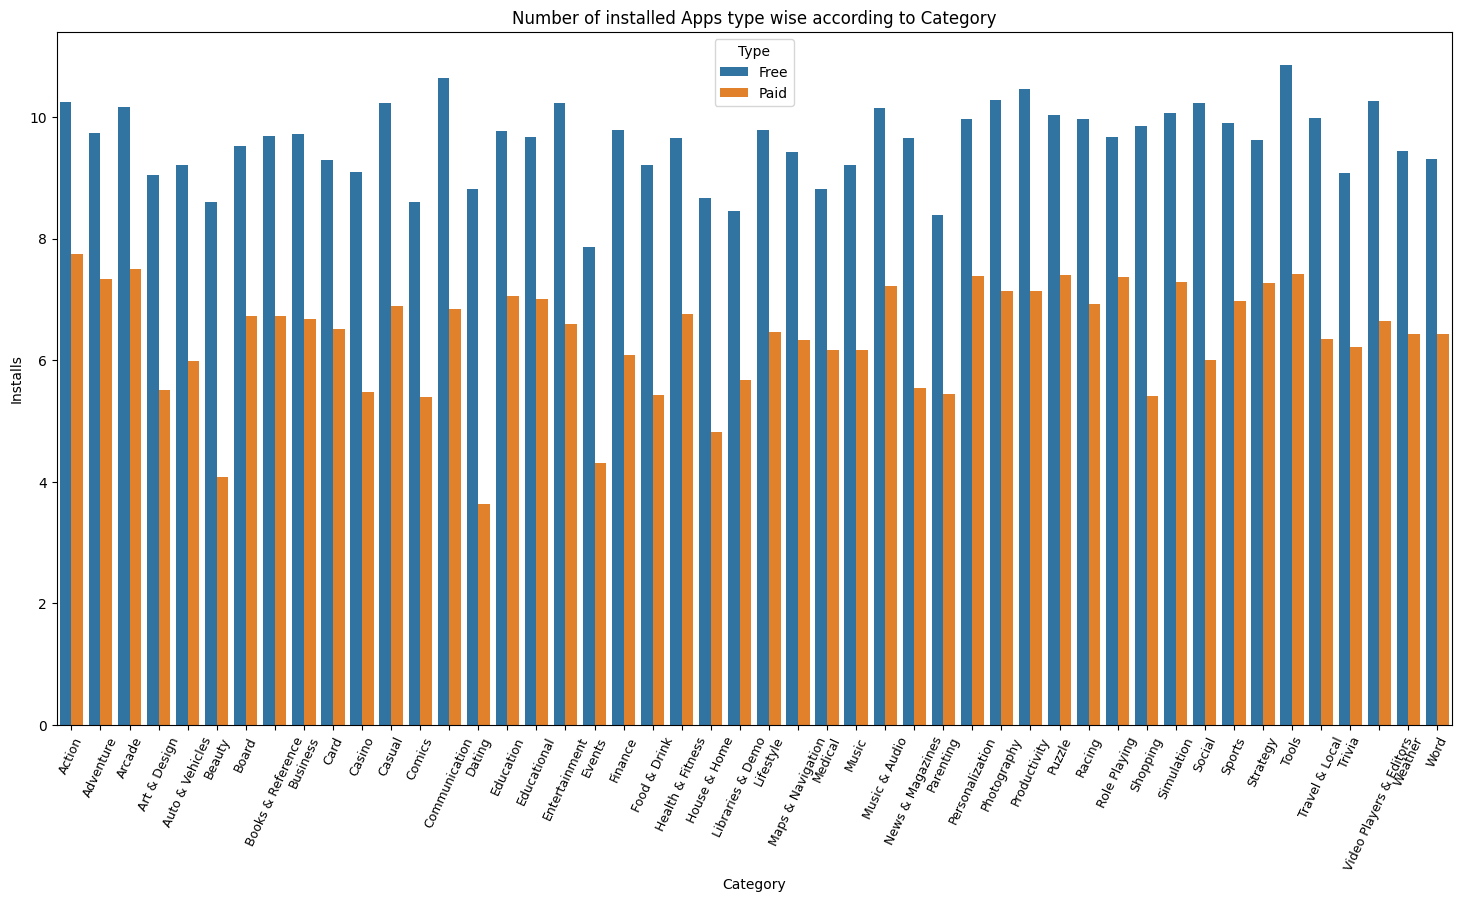

In [153]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot(x = 'Category', y = 'log_Installs', hue='Type', data=categoty_type_installs)

In [154]:
## action category has more paid apps & tools category has more free apps

### How does the size of the Application impacts the Installation ?

In [155]:
df['log_Installs'] = np.log10(categoty_type_installs['Installs'])

<Axes: title={'center': 'Impact of Application Size in Installation'}, xlabel='Size', ylabel='Installs'>

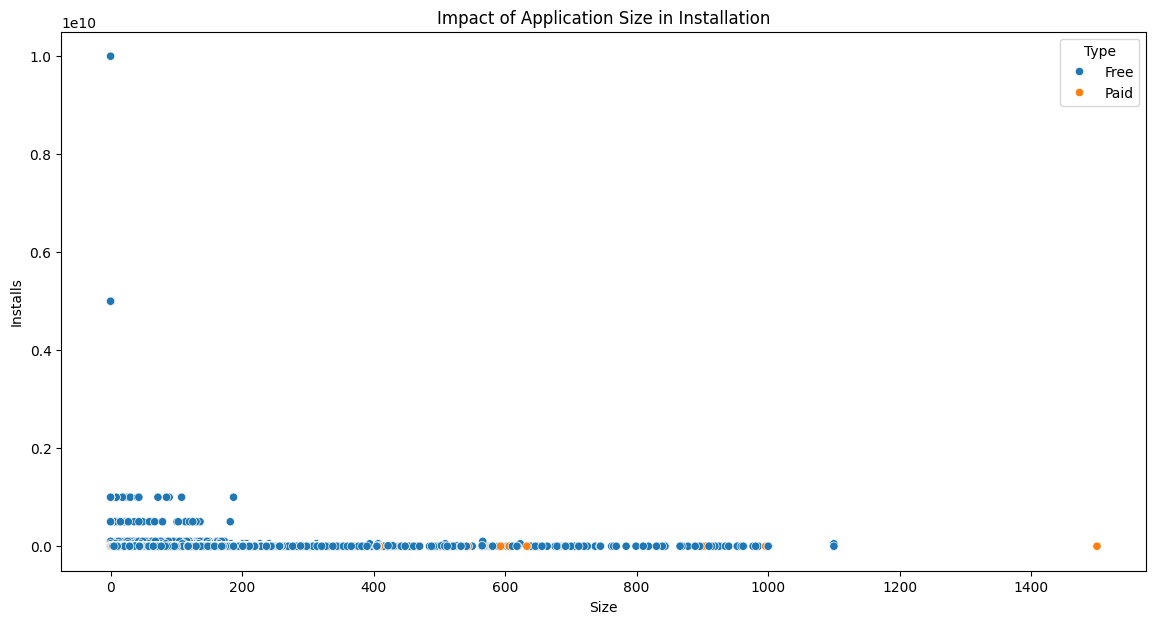

In [156]:
plt.figure(figsize=(14,7))
plt.xlabel("Size")
plt.ylabel("Installs")
plt.title("Impact of Application Size in Installation")
sns.scatterplot(x = 'Size',y = 'Installs', hue='Type', data=df)

In [157]:
# from the above plot we can see that size impacts the number of installations. Applications with large size are less installed by the user.

### correlations 

In [166]:
numeric_bool_cols = df.select_dtypes(include=['int', 'float', 'bool'])
numeric_bool_cols.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size,Ad Supported,In App Purchases,Editors Choice,log_Installs
Rating,1.00,0.01,0.01,0.01,0.01,-0.00,0.05,0.16,0.15,0.02,-0.02
Rating Count,0.01,1.00,0.55,0.55,0.55,-0.00,0.01,0.01,0.03,0.14,0.08
Installs,0.01,0.55,1.00,1.00,0.95,-0.00,0.00,0.00,0.01,0.06,0.08
Minimum Installs,0.01,0.55,1.00,1.00,0.95,-0.00,0.00,0.00,0.01,0.06,0.08
Maximum Installs,0.01,0.55,0.95,0.95,1.00,-0.00,0.01,0.00,0.02,0.06,0.08
Price,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.03,-0.00,0.00,NaN
Size,0.05,0.01,0.00,0.00,0.01,0.00,1.00,-0.04,0.17,0.04,0.02
Ad Supported,0.16,0.01,0.00,0.00,0.00,-0.03,-0.04,1.00,0.14,0.01,0.14
In App Purchases,0.15,0.03,0.01,0.01,0.02,-0.00,0.17,0.14,1.00,0.05,-0.02
Editors Choice,0.02,0.14,0.06,0.06,0.06,0.00,0.04,0.01,0.05,1.00,NaN


<Axes: >

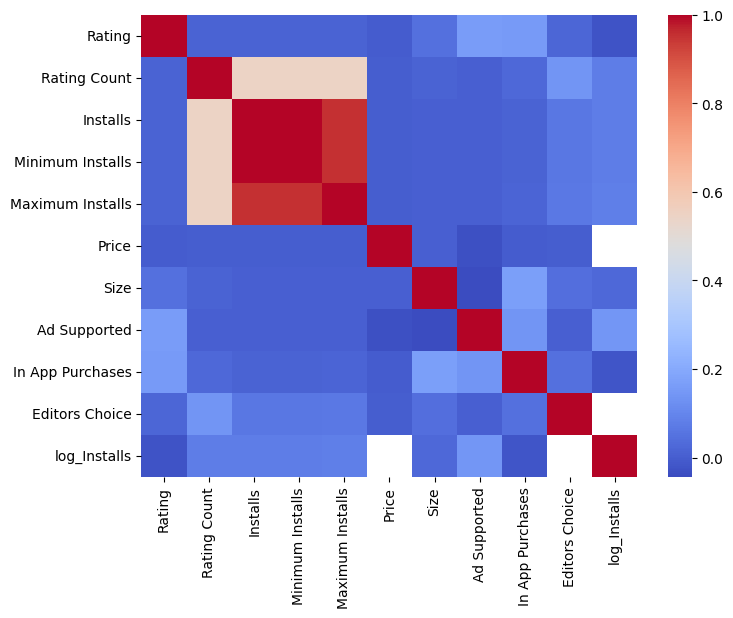

In [167]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_bool_cols.corr(),cbar= True, cmap='coolwarm')

Factors like AdSupport and InappPurchases are correlated to app rating. So we can say that if the app provides customer support and have subscription plans we can engage more customers. We can also see from the same graph that the editor's choice plays a important role as well. With high editor choice we can see high ratings count and high installs.

### What are the Top 5 Paid Apps based With highest ratings and installs ?

In [168]:
df['Installs'].max()

10000000000

In [169]:
paid_apps = df[(df.Type=='Paid') & (df.Installs >= 5000000)]
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)

<Axes: title={'center': 'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

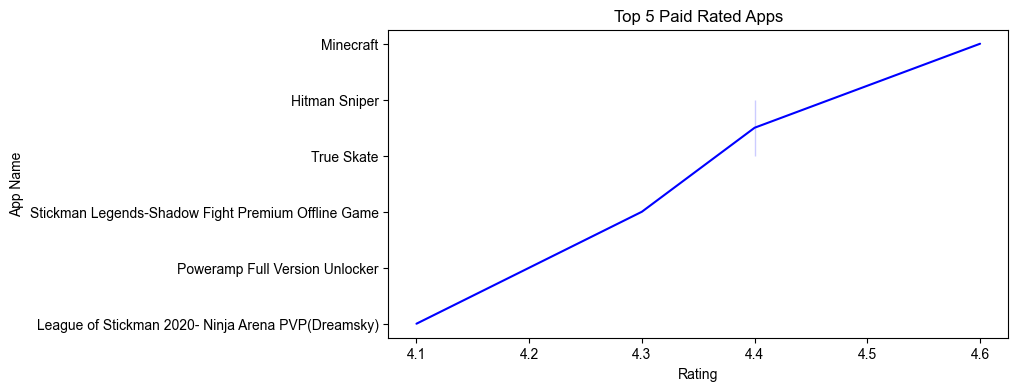

In [170]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')

Minecraft, Hitman Sniper, True Skate, Stickman Legends-Shadow Fight Premium Offline Game, Poweramp Full Version Unlocker, League of Stickman 2020- Ninja Arena PVP(Dreamsky)

### What are the Top 5 Free Apps based With highest ratings and installs ?

In [171]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
free_apps = free_apps.head(5)

<Axes: title={'center': 'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

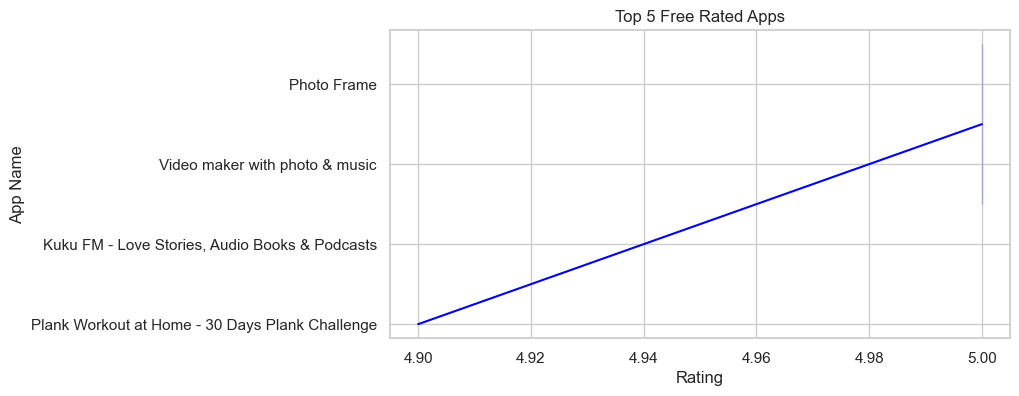

In [172]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x = free_apps.values, y = free_apps.index,color = 'Blue')

Photo Frame, Video maker with photo & music, Kuku FM - Love Stories,Audio Books & Podcasts, Plank Workout at Home.

### Visualize the categories that have the Top 10 Max Installations

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

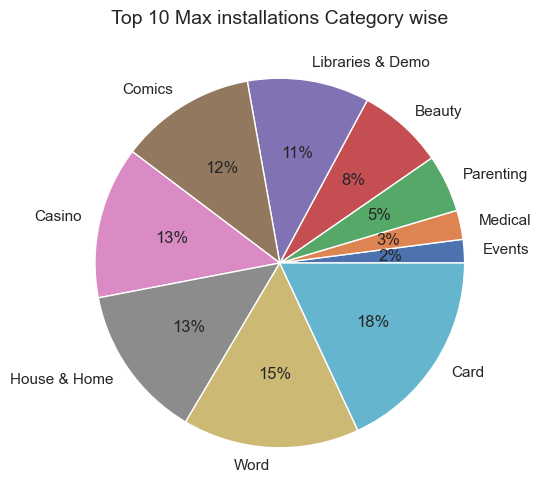

In [173]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels,autopct='%.0f%%') 
plt.title("Top 10 Max installations Category wise", fontsize=14)

### Visualize the Top 10 installation Categories that Adults have installed the most

In [174]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

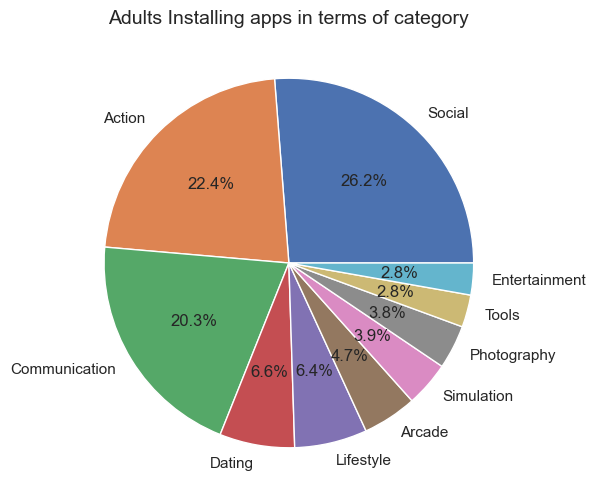

In [175]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

In [176]:
# Most of the Adults showing intrest in downloading the Social, Action and Communication Category

### visualize Teens Installing the apps in terms of Category

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

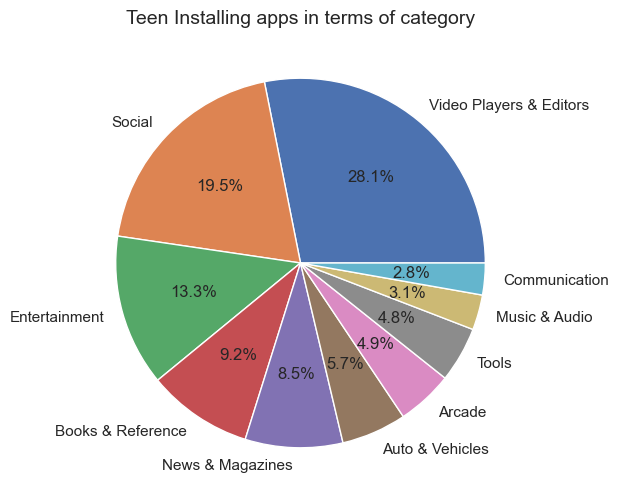

In [177]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x = Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category", fontsize=14)

### summary

- People are more intrested to install the gaming Apps, the top Rating is given to the gaming apps.
- InAppPurchases are correlated to App rating. So we can say that if the app provides customer support and have subscription plans it will helps to engage customers.
- most people does not gave rating, But the people who are given rating are tend to give 4+ rating the most.
- Most of the Audlts installed the Social and communication Apps.
- Most of the installations are done by the teens and the most are Video Players and Editors. Video Players and Editors has more demand.
Size of the Application varies the installations.
- People are mostly dwonladed the free apps the installation of the free apps is high and the availabilty of the free apps also is very high.